<a href="https://colab.research.google.com/github/PATELOM925/Data-Mining/blob/main/Data_Mining_A2_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment (II)

---


## Please write your full name/names and student IDs here:




*   Full Name: Michael Murphy (Q1, Q2, Q5 - Tasks TODO)
*   Student ID: 222636120

# Q1



---


# Question 1. (3 points)
* **For this question, please follow the steps outlined below:**
## Part (a):

* **Data Loading:** Read the lymph dataset from your mounted Google Drive using Pandas.

* **Data Splitting:** Split the dataset randomly into a 60% training set and a 40% test set using scikit-learn's train_test_split function.

* **Handling Categorical Data:** Encode categorical attributes with one-hot encoding using pandas.get_dummies, dropping the first attribute to avoid redundancy.

* **Decision Tree Classifier (1st Experiment):** Train a Decision Tree classifier in scikit-learn on the training data, setting the splitting criterion to "entropy," and requiring a minimum of 4 samples to split an internal node. Keep other settings unchanged.

* **Reproducibility:** Set the random_state to 32 in train_test_split and DecisionTreeClassifier to make your codes reproducible.

* **Performance Evaluation (1st Experiment):** Report the Decision Tree classifier's accuracy on the test data. Also, generate a high-resolution tree visualization (use plt.figure(figsize=(12, 8), dpi=300)).





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The accuracy of the trained classifier is: 88.33%


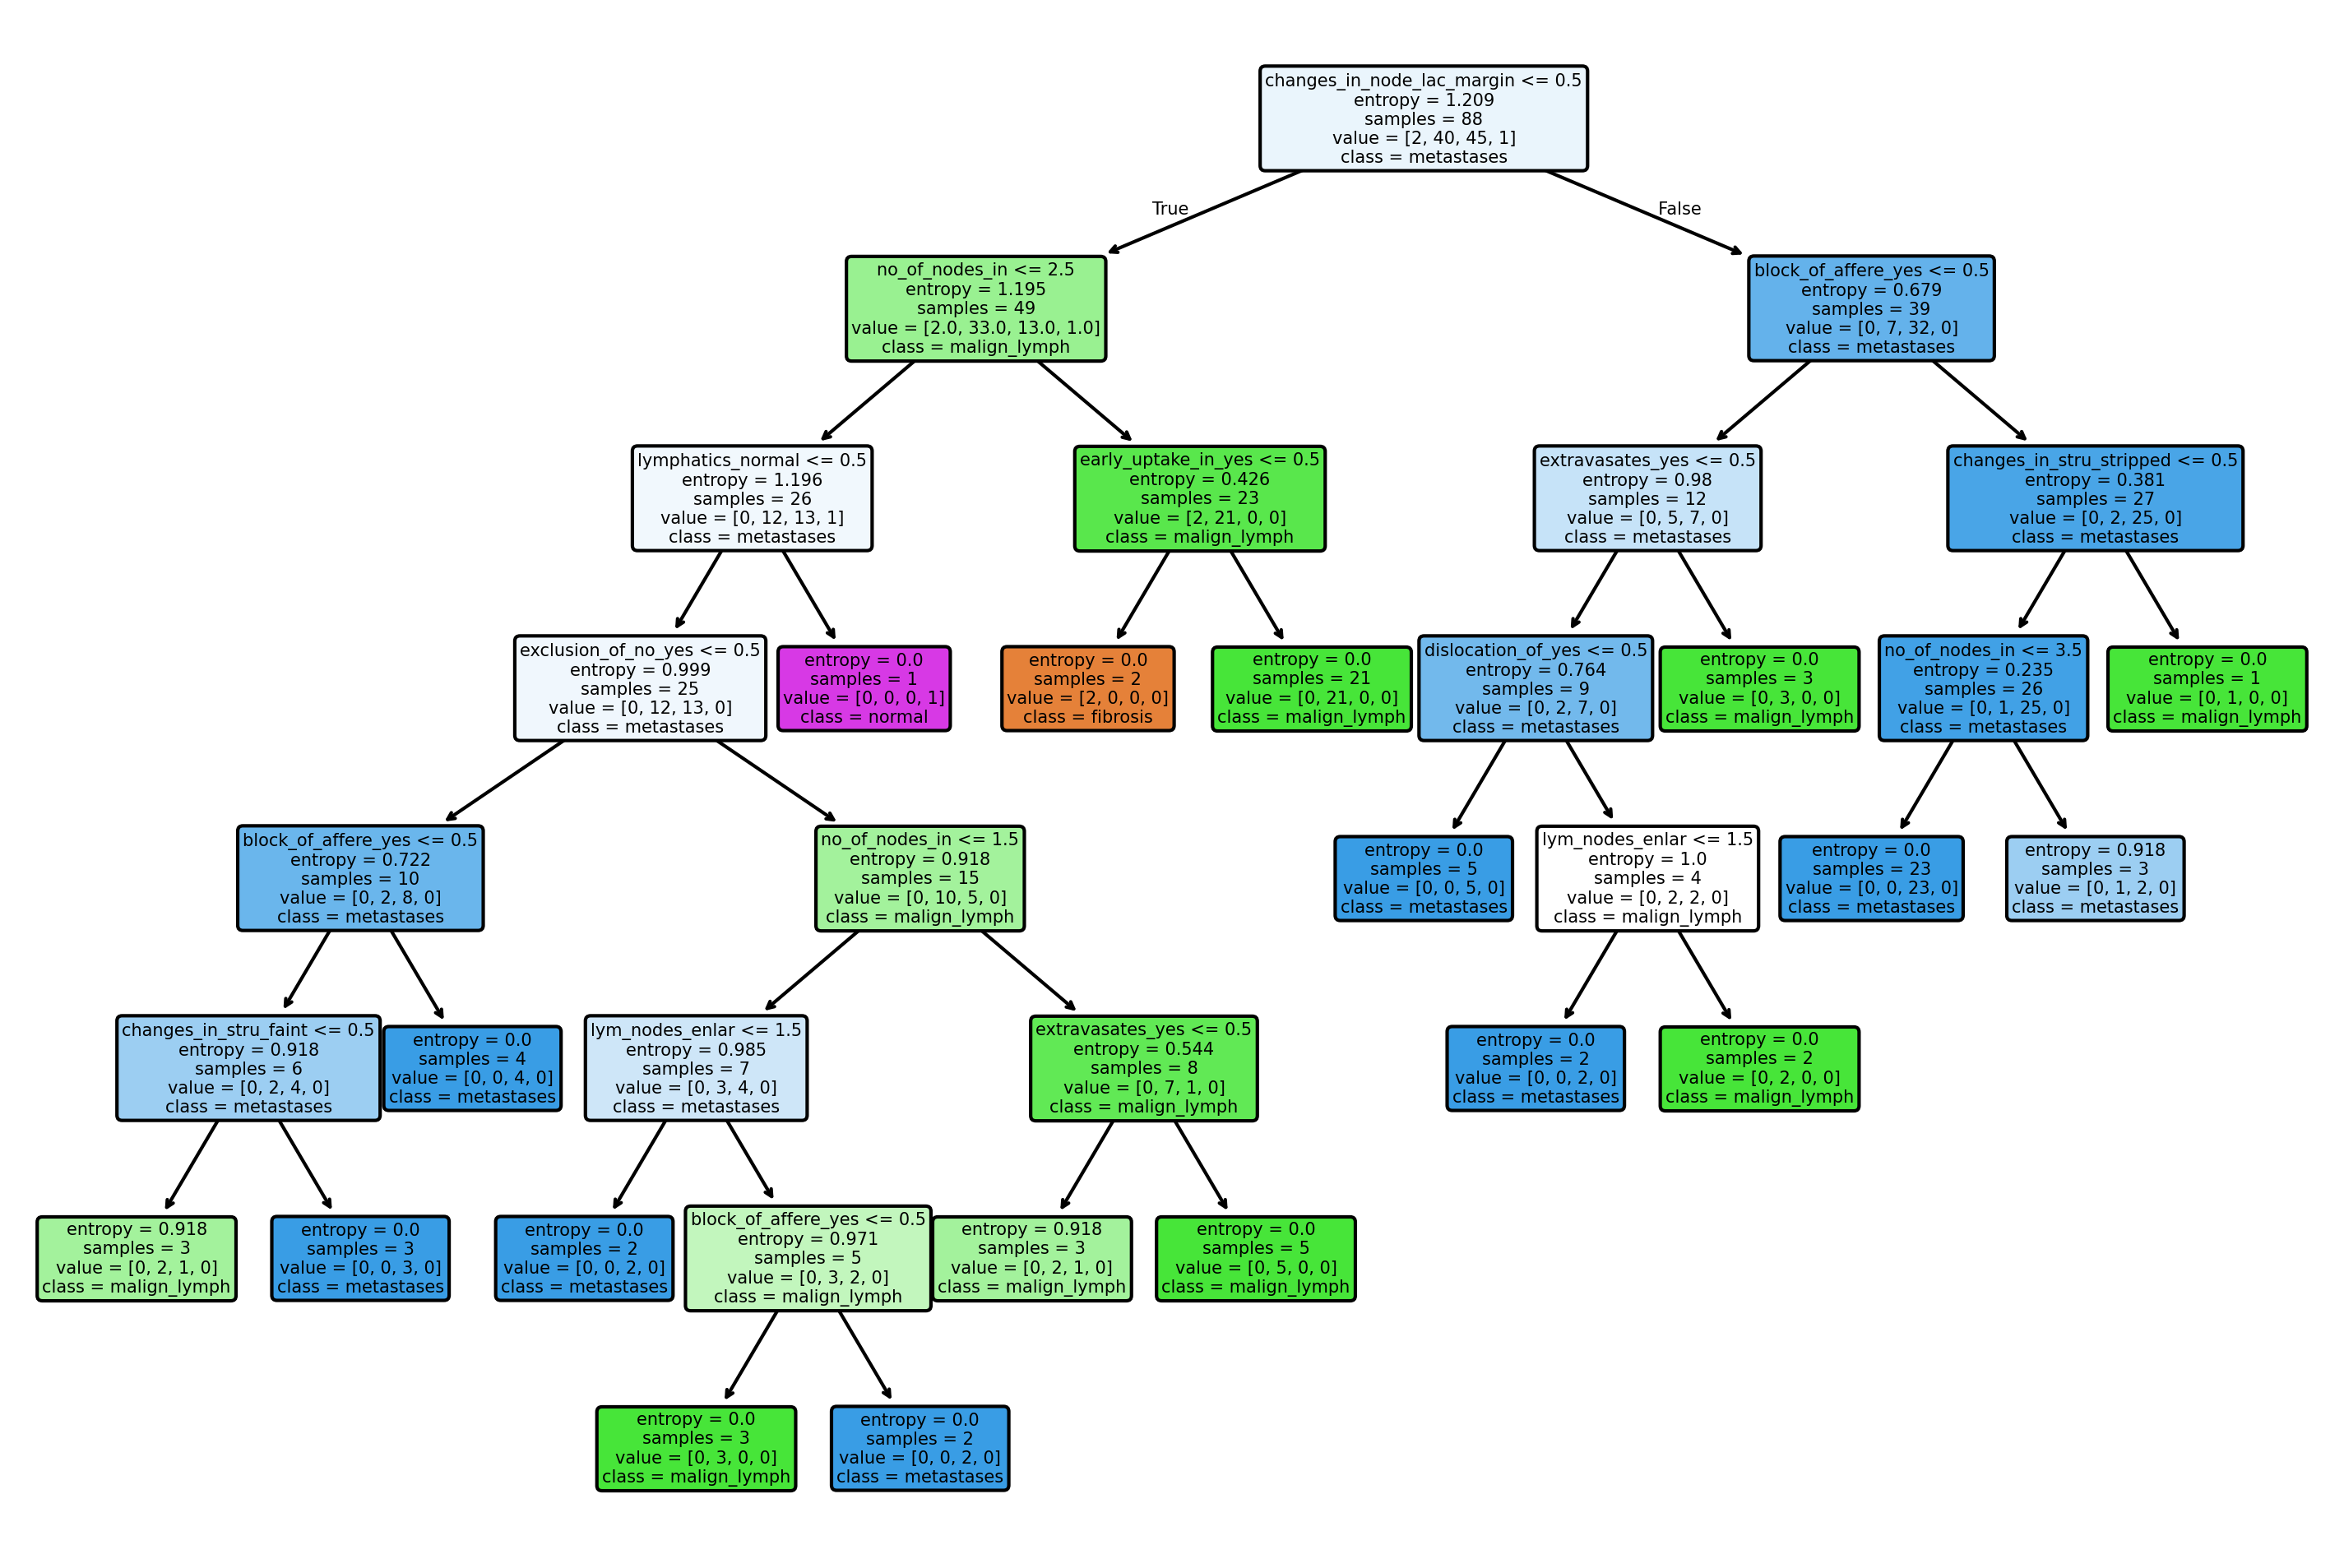

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("drive/MyDrive/DataMining_A2/lymph.csv")  # Load your dataset
# df = pd.read_csv("lymph.csv")  # Load your dataset

#.............................................................................
# write the rest here

# 0. Extra Data Preparation

## Dataset has "'" in the column names
## Need to remove these quotes, as they are causing column name mismatches when calling pd.get_dummies
# print(df.columns.tolist())    # Shows column names, with surrounding quotes "'"
df.columns = [col.strip().replace("'", "") for col in df.columns]
# print(df.columns.tolist())    # Column names have no quotes now



# 1. Handling Categorical Data

## eClass: Scikit-learn primarily operates with numerical data and does not inherently support categorical attributes,
## except for the target attribute in classification problems. To work with categorical attributes in your feature set,
## you will typically need to encode them into a numerical format, often using techniques like one-hot encoding.

## Notebook: Encode categorical attributes with one-hot encoding using pandas.get_dummies, dropping the first attribute to avoid redundancy.

# Note: The assignment calls for data splitting, and then handling categorical data, but I have opted to do this in reverse.
# This is because when the data is split into testing and training data first,
# and then each dataset's categorical columns are one-hot encoded with pd.get_dummies,
# the two datasets end up with different amounts of columns; 33 in the training data, 32 in the testing data.
# Specifically, in random_state=32, the testing data is missing the "changes_in_stru_no" column.
# This is likely because the testing data doesn't have any samples where changes_in_stru=no.
# This mismatch causes an issue when trying to make predictions on the trained classifier later.
# However, doing the encoding first and *then* splitting the data ensures that both datasets have the same columns.

# Function for encoding categorical data with one-hot encoding
# Assumes that `dataset` is a pandas frame, and that the columns in `cols` do exist in `dataset`
# Drops the first attribute by default
def categorical_to_onehot(dataset, columns, drop_first=True):
    return pd.get_dummies(dataset, columns=columns, drop_first=drop_first)


# Specify the categoricalz columns in the dataset
categorical_cols = ['lymphatics', 'block_of_affere', 'bl_of_lymph_c', 'bl_of_lymph_s', 'by_pass', 'extravasates', 'regeneration_of', 'early_uptake_in',
                    'changes_in_lym', 'defect_in_node', 'changes_in_node', 'changes_in_stru', 'special_forms', 'dislocation_of', 'exclusion_of_no']

# Then encode the categorical data in the dataset
df_catencoded = categorical_to_onehot(df, categorical_cols)
# print(df_catencoded)

# First attempt: Encode categorical data in the both data splits
# train_data_catencoded = categorical_to_onehot(train_data, categorical_cols)
# test_data_catencoded = categorical_to_onehot(test_data, categorical_cols)
# print(train_data_catencoded)
# print(test_data_catencoded)



# 2. Data Splitting

# Function for Data Splitting
# Uses 60% vs. 40% split and random_state=32 by default, can use other values if necessary
def split_data(dataset, train_proportion=0.6, random_state=32):
    dataset_size = len(dataset)
    train_size = int(train_proportion * dataset_size)
    test_size = dataset_size - train_size
    return train_test_split(dataset, test_size=test_size, train_size=train_size, random_state=random_state)


# Perform data splitting using the function's default values
# Split the encoded dataset into training and testing data
train_data_catencoded, test_data_catencoded = split_data(df_catencoded)
# print(train_data_catencoded)
# print(test_data_catencoded)

# First attempt: Split the original dataset
# train_data, test_data = split_data(df)
# print(train_data)
# print(test_data)



# 3. Decision Tree Classifier (1st Experiment)

## eClass: Set the criterion of the "DecisionTreeClassifier" algorithm to "entropy" and the minimum number of samples required to split an internal node to 4
## Notebook: Set the random_state to 32 in train_test_split and DecisionTreeClassifier to make your codes reproducible.
## Keep the other settings unchanged

# Function for extracting the column of a dataset containing the target labels for that data
# Assumes that `dataset` contains both features and labels, and that `label_col` exists in `dataset` and represents the column with labels
def separate_labels_and_features(dataset, label_col='class'):
    dataset_labels = dataset[label_col]
    dataset_features = dataset.drop(label_col, axis=1)
    return dataset_features, dataset_labels


# Function for training a decision tree classifier on a given dataset
# Assumes that `training_data` contains both features and labels
# By default, uses 'entropy' criterion, a minimum sample split of 4, and random state of 32
def train_clf(training_data, label_col='class', criterion='entropy', min_samples_split=4, random_state=32):
    # First separate features and labels
    training_data_features, training_data_labels = separate_labels_and_features(training_data, label_col)

    # Then initialise and train the classifier using the separated features and labels
    clf = DecisionTreeClassifier(criterion=criterion, min_samples_split=min_samples_split, random_state=random_state)
    clf.fit(training_data_features, training_data_labels)
    return clf


# Train a Decision Tree Classifier on the lymph dataset
clf_lymph = train_clf(train_data_catencoded)



# 4. Performance Evaluation (1st Experiment)

## eClass: Report the accuracy of the Decision Tree classifier on the test dataset. Additionally, plot the constructed tree.

# Function for evaluating a trained decision tree classifier on a given test dataset
# Assumes that `testing_data` contains both features and labels
def evaluate_clf(clf, testing_data, label_col='class'):
    # First separate features and labels
    testing_data_features, testing_data_labels = separate_labels_and_features(testing_data, label_col)

    # Then make predictions using the trained classifier
    testing_data_predictions = clf.predict(testing_data_features)

    # Check the accuracy of these predictions
    accuracy = accuracy_score(testing_data_labels, testing_data_predictions)
    print(f"The accuracy of the trained classifier is: {accuracy*100:.2f}%")

    # Plot a visualisation of the tree
    # Note: using round-edged, filled-in nodes, as they look more pleasant. Also using the max font size possible while avoiding overlapping nodes
    plt.figure(figsize=(12, 8), dpi=300)
    plot_tree(clf, feature_names=testing_data_features.columns, class_names=clf.classes_, filled=True, rounded=True, fontsize=5)
    plt.show()

    return testing_data_predictions, accuracy


# Evaluate the lymph-trained Decision Tree Classifier
clf_lymph_predictions, clf_lymph_accuracy = evaluate_clf(clf_lymph, test_data_catencoded)

#.............................................................................


## Part (b):


Modify the minimum samples required for splitting to 32 and re-run the experiment. Report the accuracy of the Decision Tree classifier with the modified parameter and create a visualization of the tree. Discuss the differences between the two Decision Trees and their respective results, highlighting how changing the minimum samples for splitting affects the tree structure and performance.


The accuracy of the trained classifier is: 76.67%


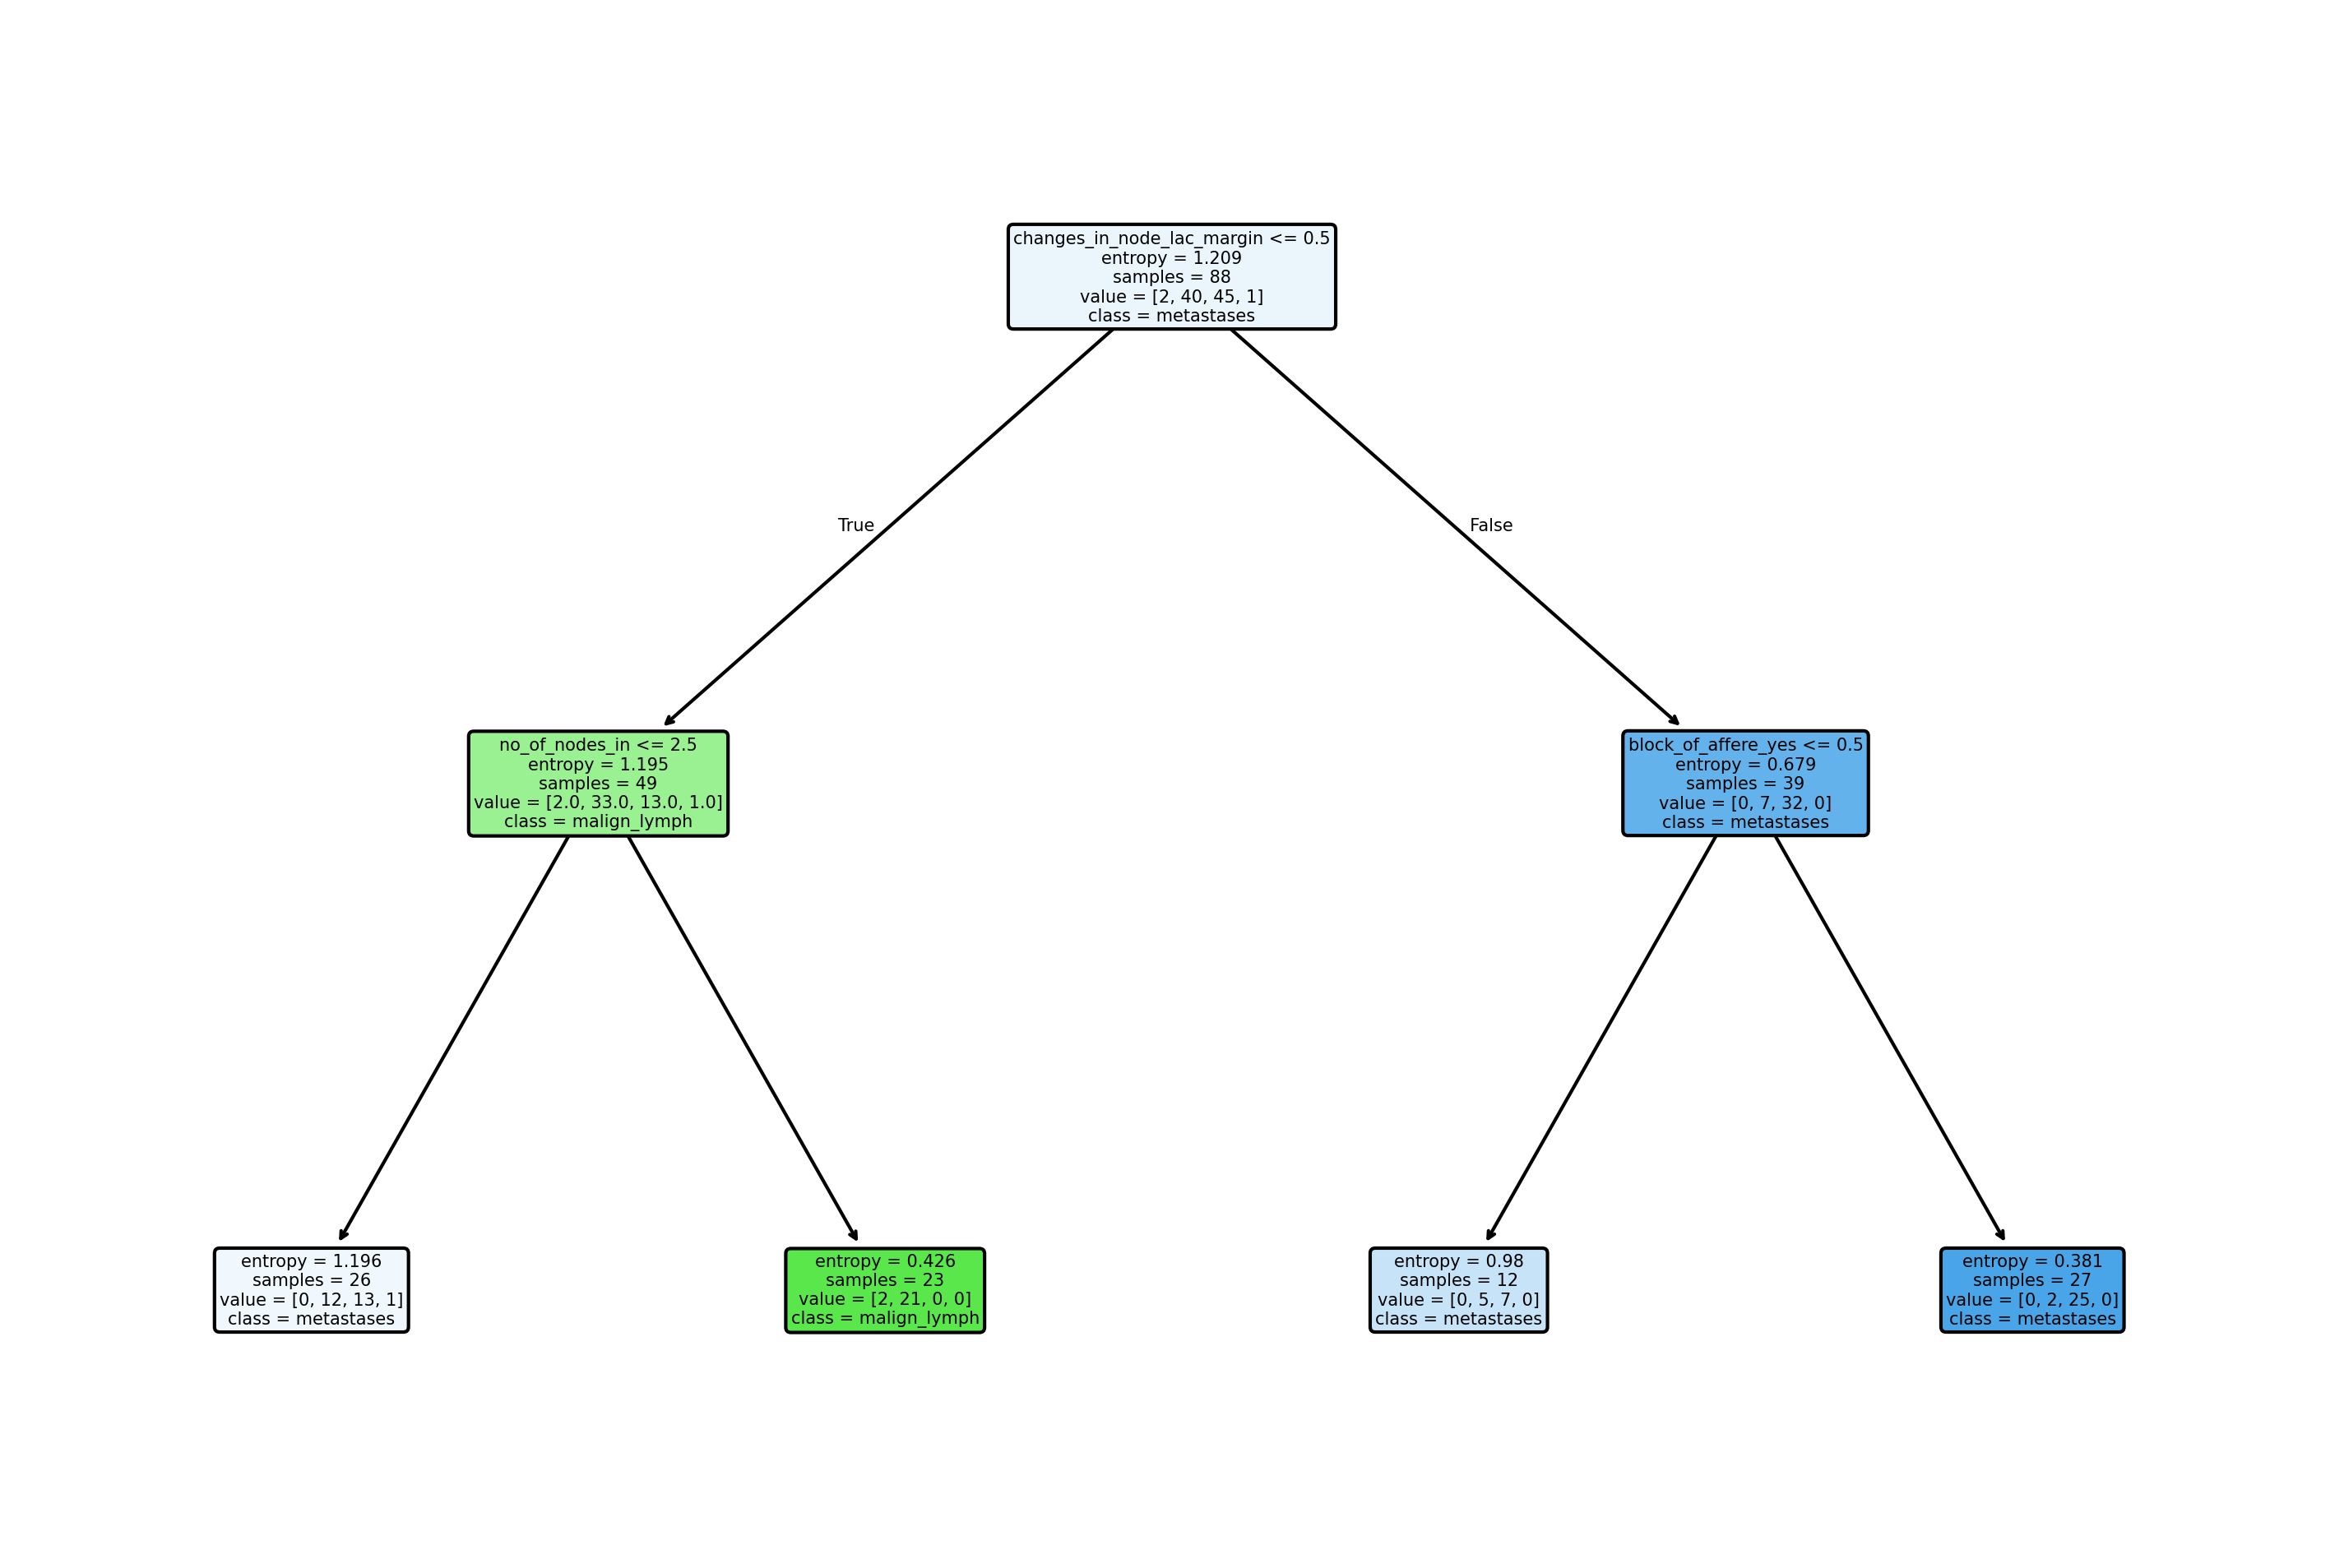

In [ ]:

#.............................................................................
# write the rest here

# 1. Decision Tree Classifier (2nd Experiment)

## eClass: Change the minimum samples required for splitting to 32 and re-run the experiment.

# Train a new classifier, using a minimum sample split of 32 instead of 4
clf_lymph2 = train_clf(train_data_catencoded, min_samples_split=32)


# 2. Performance Evaluation (2nd Experiment)
## eClass: Report the accuracy of the Decision Tree classifier with the new parameter and create a visualization of the tree.
# Evaluate the newly trained classifier
clf_lymph2_predictions, clf_lymph2_accuracy = evaluate_clf(clf_lymph2, test_data_catencoded)

#.............................................................................




---


**Put your discussion here**


Discuss here.

From eClass: Discuss the differences between the two Decision Trees and their respective results,
highlighting how changing the minimum samples for splitting affects the tree structure and performance.


Firstly, it should be noted that the two classifiers differ only in the minimum number of samples required
to split a node (`min_samples_split`), where the first classifier requires 4 nodes, and the second classifier
requires 32. There are no other differences, not even in randomness, as we have enforced deterministic fitting
by setting `random_state` to 32 in both cases. This setup gives us a very clear picture of the effect of using
a larger value for `min_samples_split`.

The first, and most obvious, difference between the two classifiers is in their actual tree structure. The
first tree is a lot more complex in terms of structure, with 35 nodes, compared with only 7 nodes in the
second tree. Interestingly, the second tree is exactly the same as the first 3 levels of the first tree,
both in terms of the number of samples in the 7 nodes, and also the representative feature values shown in
the plotted trees. However, the first tree continues splitting the data for a further 5 levels, resulting
in leaf nodes with much smaller numbers of samples (mostly less than 4). The increased complexity of the first
tree confers a significant performance benefits; the accuracy of the two classifiers are 88.33% and 76.67%,
respectively.

One immediately obvious reason for the lower performance of the second classifier is that its tree does not
have *any* nodes that represent the "normal" or "fibrosis" classes, meaning that it will **never** classify
these types of samples correctly. Instead, it will misclassify samples in these classes as "metastases" or
"malign_lymph". The reason that the second classifier missed out on these nodes is that our training dataset
only had a small number of samples of these classes. Given that the second classifier only splits nodes when
there are at least 32 samples found, it was unable to split itself enough to represent these classes.

Given these observations, we could naturally conclude that the first classifier is the better choice for
future use. However, we must take care to not simply assume that a higher `min_samples_split` size is always
bad. With a different dataset, using a `min_samples_split` size of 4 might lead to overfitting on the
training data, as the tree's structure will be too tailored to the specific values of the training data
features, and might struggle to generalise to other datasets.

No matter what, we must always ensure that we thoroughly evaluate our classifier, to ensure that it is
properly fine-tuned to its use case. Our simple accuracy score is, of course, a solid and simple measure,
but in practise we will likely need more sophisticated techniques like K-fold cross validation to further
tweak our classifier for better performance.

# Q2



---


# Question 2. (5 points)
## Part (a):
*  Write a Python function named "preprocess" that preprocesses and prepares
datasets for machine learning. It must take a training dataset and an optional test dataset as input. The code must first identify categorical and numerical attributes, then handle missing values by imputing the mean for numerical attributes and the most frequent value for categorical attributes. It is worth noting that to determine if an attribute is numerical, the process should involve checking its data type and potentially examining the number of unique values. This is necessary because an attribute may appear to have an "object" data type but could, in fact, be numerical in nature.

*  Subsequently, the "preprocess" code must standardize the numerical attributes by removing the mean and scaling to unit variance., and encodes categorical attributes using one-hot encoding.

*  If a test dataset is provided, it must undergo the same preprocessing steps, ensuring that the imputation for missing values and data scaling are performed based on the values obtained from the training dataset, thus maintaining consistency between the two datasets.

*  At the end, the function must return the preprocessed training and test datasets as (X_train, y_train, X_test, y_test) tuple if the test dataset exists. Otherwise it must return (X_train, y_train). X stands for independent processed attributes, while y indicates the class attribute.

In [34]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
def preprocess(train_df, test_df=None, n_unique_threshold=0.1, label_col='class', missing_value_placeholder='?'):
    #.............................................................................
    # write your codes here

    # eClass: Create a Python function called "preprocess" to prepare datasets for machine learning. It takes
    # a training dataset and an optional test dataset. First, it identifies categorical and numerical attributes,
    # imputing missing values with means for numerical and modes for categorical. Then, it standardizes numerical
    # attributes and encodes categorical ones using one-hot encoding. If a test dataset is provided,
    # it undergoes the same preprocessing, ensuring consistency by using statistics from the training dataset.

    # We will start by separating the label columns from our other columns, using the function
    # that we defined in Q1
    training_df_features, training_df_labels = separate_labels_and_features(train_df, label_col)
    # print(training_df_features)
    # print(training_df_labels)

    # Now we should identify which columns are categorical, and which are numerical
    # The naive approach would be to simply check the types reported by `training_df_features.dtypes`
    # print(training_df_features.dtypes)

    # With this simple approach, we can simply extract the columns that report numerical types
    numerical_cols = training_df_features.select_dtypes(include=["number"]).columns.tolist()

    # However, this has shortcomings, because if even a single value from a numerical column has a non-numerical
    # value (e.g., a "?" representing missing data), then `dtypes` will report that entire column as "object".
    # This happens with columns "A2" and "A14". We need to write code that is resistant to this generalisation.

    # We can do this by inspecting any columns with non-"number" data types more closely, and seeing how many unique
    # values are contained in those columns - columns with a high number of unique values are probably numeric
    n = len(train_df)
    categorical_cols = []       # Also keep track of the categorical columns
    for col in training_df_features.select_dtypes(exclude=["number"]).columns:
        # If the ratio of unique values to total values is high (say above 10%), then the column is probably numeric
        n_unique = train_df[col].nunique()
        if (n_unique / n) > n_unique_threshold:
            # print(col, n_unique, n_unique / n)
            numerical_cols.append(col)
        # If the number of unique values is low, we will assume that it is categorical
        else:
            categorical_cols.append(col)

    # Now our lists of numerical and categorical columns are complete
    # print(numerical_cols)
    # print(categorical_cols)
    # print(training_df_features[numerical_cols])
    # print(training_df_features[categorical_cols])


    # Impute means for numerical columns, and modes for categorical columns
    training_df_features_imputed = training_df_features.copy()

    # First, need to replace placeholder values in our numerical columns with NaN, so that SimpleImputer can process them
    training_df_features_imputed[numerical_cols] = training_df_features_imputed[numerical_cols].replace(missing_value_placeholder, np.nan)

    # Now we can use SimpleImputer to impute the means for these columns
    num_imputer = SimpleImputer(strategy='mean')
    training_df_features_imputed[numerical_cols] = num_imputer.fit_transform(training_df_features_imputed[numerical_cols])

    # Impute modes for categorical columns
    # This can be done directly without any transformation - just need to specify the value that represents missing data
    cat_imputer = SimpleImputer(strategy='most_frequent', missing_values=missing_value_placeholder)
    training_df_features_imputed[categorical_cols] = cat_imputer.fit_transform(training_df_features_imputed[categorical_cols])


    # Standardise (normalise?) numerical columns, and encode categorical columns with one-hot encoding
    training_df_features_imputed_standardised_encoded = training_df_features_imputed.copy()

    # We can use StandardScaler.fit_transform to learn the means and variances of the numerical columns in training data,
    # and to then standardise those columns with this info, in a single function call
    scaler = StandardScaler()
    training_df_features_imputed_standardised_encoded[numerical_cols] = scaler.fit_transform(
        training_df_features_imputed_standardised_encoded[numerical_cols]
        )

    # For encoding categorical columns, we simply use our `categorical_to_onehot` function from Q1
    training_df_features_imputed_standardised_encoded = categorical_to_onehot(training_df_features_imputed_standardised_encoded, categorical_cols)

    # Now we are ready to return the training data; just need to assign the proper variable names
    X_train = training_df_features_imputed_standardised_encoded
    y_train = training_df_labels

    # If testing data was provided, we also need to preprocess this:
    if test_df is not None:
        # Separate the feature and label columns
        test_df_features, test_df_labels = separate_labels_and_features(test_df, label_col)

        # No need to reidentify which columns are numerical/categorical - can move straight to imputing, standardising, and encoding
        # In this case, we can use the already-trained imputers and scaler, so that the test data is transformed in a way that
        # is consistent with the training data - i.e., we will use the `transform` methods instead of the `fit_transform` methods
        test_df_features_imputed_standardised_encoded = test_df_features.copy()
        test_df_features_imputed_standardised_encoded[numerical_cols] = test_df_features_imputed_standardised_encoded[numerical_cols].replace(missing_value_placeholder, np.nan)
        test_df_features_imputed_standardised_encoded[numerical_cols] = num_imputer.transform(test_df_features_imputed_standardised_encoded[numerical_cols])
        test_df_features_imputed_standardised_encoded[categorical_cols] = cat_imputer.fit_transform(test_df_features_imputed_standardised_encoded[categorical_cols])
        test_df_features_imputed_standardised_encoded[numerical_cols] = scaler.fit_transform(test_df_features_imputed_standardised_encoded[numerical_cols])
        test_df_features_imputed_standardised_encoded = categorical_to_onehot(test_df_features_imputed_standardised_encoded, categorical_cols)

        # Assign proper variable names
        X_test = test_df_features_imputed_standardised_encoded
        y_test = test_df_labels

    #.............................................................................
    if test_df is not None:
        return X_train, y_train, X_test, y_test
    else:
        # If no test dataset is provided, return only the preprocessed training dataset
        return X_train, y_train


## Part (b)
In this task, your objective is to assess the performance of various machine learning classifiers for a credit classification problem. To ensure result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100. Finally, report the accuracy achieved on the test dataset.

In [ ]:
# eClass: You are given a training data set and a test data set on credit card application approval. The data sets describe a total of
# 690 customers (552 for training and 138 for testing) with 16 attributes. The last attribute is the class attribute describing whether
# the customer's application was approved. Several of the condition attributes contain missing values (which are marked by "?"). All
# attribute names and values have been changed to meaningless symbols to protect the confidentiality of the data.

# Please use the "preprocess" function you wrote in the previous part to handle missing values and standardize your numerical features.
# Then adopt the following algorithms to learn a classification model from the preprocessed training data set and test the model on
# the preprocessed test data set:
# - Decision Tree Classifier (DecisionTreeClassifier)
# - k-Nearest Neighbor (KNeighborsClassifier) with k=1
# - k-Nearest Neighbor (KNeighborsClassifier) with k=3
# - Gaussian Naive Bayes (GaussianNB)
# - Logistic Regression (LogisticRegression)
# - MLP Neural Network (MLPClassifier)
# - Random Forest (RandomForestClassifier)

# Please report the classification accuracy of each algorithm on the test set. To ensure result reproducibility, set the random_state
# to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50
# hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.

In [ ]:
# import necessary libraries

# Load the training and test datasets
# credit_train = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/credit-a-train.csv")
# credit_test = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/credit-a-test.csv")
credit_train = pd.read_csv("credit-a-train.csv")
credit_test = pd.read_csv("credit-a-test.csv")

# Preprocess the datasets and split them into features (X) and target (y)
X_train, y_train, X_test, y_test = preprocess(credit_train, credit_test)

#.............................................................................
# write your codes here
# First, import the classifiers that we will be using
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# The skeleton code already calls "preprocess" function on the provided datasets, giving us X_train, y_train, X_test, and y_test
print("Training and testing data has been pre-processed")

# This pre-processed data can now be given to each of the classifiers mentioned, to see how they perform
# All classifier are left with their default values, except for the following:
# - n_neighbours=1 for first KNN, and 3 for second KNN
# - random_state=42 in DT, KFold (is this supposed to be KNN? KNN doesn't have random state...), MLP, and RF
# - hidden_layer_sizes=(100, 50) in MLP
# - max_iter=1000 in MLP
# - n_estimators=100 in RF (seems to be the default anyway)
n_neighbors1 = 1
n_neighbors2 = 3
random_state = 42
hidden_layer_sizes = (100, 50)
max_iter = 1000
n_estimators = 100

# Create each classifier
clf_credit_dt = DecisionTreeClassifier(random_state=random_state)
clf_credit_knn1 = KNeighborsClassifier(n_neighbors=n_neighbors1)
clf_credit_knn2 = KNeighborsClassifier(n_neighbors=n_neighbors2)
clf_credit_gnb = GaussianNB()
clf_credit_lr = LogisticRegression()
clf_credit_mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=random_state)
clf_credit_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

# Train each classifier on the pre-processed training data
clf_credit_dt.fit(X_train, y_train)
clf_credit_knn1.fit(X_train, y_train)
clf_credit_knn2.fit(X_train, y_train)
clf_credit_gnb.fit(X_train, y_train)
clf_credit_lr.fit(X_train, y_train)
clf_credit_mlp.fit(X_train, y_train)
clf_credit_rf.fit(X_train, y_train)
print("Classifiers have been trained")

# Make predictions on the pre-processed testing data with each classifier
y_pred_dt = clf_credit_dt.predict(X_test)
y_pred_knn1 = clf_credit_knn1.predict(X_test)
y_pred_knn2 = clf_credit_knn2.predict(X_test)
y_pred_gnb = clf_credit_gnb.predict(X_test)
y_pred_lr = clf_credit_lr.predict(X_test)
y_pred_mlp = clf_credit_mlp.predict(X_test)
y_pred_rf = clf_credit_rf.predict(X_test)
print("Predictions have been made")

# Calculate and output the accuracy of each classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn1 = accuracy_score(y_test, y_pred_knn1)
accuracy_knn2 = accuracy_score(y_test, y_pred_knn2)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"The accuracy of the trained classifiers are:")
print(f"- Decision Tree: {accuracy_dt*100:.2f}%")
print(f"- k-Nearest Neighbor (with k=1): {accuracy_knn1*100:.2f}%")
print(f"- k-Nearest Neighbor (with k=3): {accuracy_knn2*100:.2f}%")
print(f"- Gaussian Naive Bayes: {accuracy_gnb*100:.2f}%")
print(f"- Logistic Regression: {accuracy_lr*100:.2f}%")
print(f"- MLP Neural Network: {accuracy_mlp*100:.2f}%")
print(f"- Random Forest: {accuracy_rf*100:.2f}%")

# Also calculate average accuracy
accuracies = [accuracy_dt, accuracy_knn1, accuracy_knn2, accuracy_gnb , accuracy_lr, accuracy_mlp, accuracy_rf]
accuracy_avg = np.average(accuracies)
print(f"The average accuracy across all trained classifiers was: {accuracy_avg*100:.2f}%.")
#.............................................................................

Training and testing data has been pre-processed
Classifiers have been trained
Predictions have been made
The accuracy of the trained classifiers are:
- Decision Tree: 72.46%
- k-Nearest Neighbor (with k=1): 73.91%
- k-Nearest Neighbor (with k=3): 80.43%
- Gaussian Naive Bayes: 84.06%
- Logistic Regression: 85.51%
- MLP Neural Network: 86.23%
- Random Forest: 85.51%
The average accuracy across all trained classifiers was: 81.16%.




---


**Put your discussion here**

The accuracy of the trained classifiers are:
- Decision Tree: 72.46%
- k-Nearest Neighbor (with k=1): 73.91%
- k-Nearest Neighbor (with k=3): 80.43%
- Gaussian Naive Bayes: 84.06%
- Logistic Regression: 85.51%
- MLP Neural Network: 86.23%
- Random Forest: 85.51%

The average accuracy across all trained classifiers was 81.16%.

Out of all of these classifiers, the one that made the highest number of correct predictions on the testing
data was the **MLP Neural Network** (86.23%), which contained two hidden layers (lengths 100 and 50,
respectively). The classifier with the lowest number of correct predictions was the **Decision Tree** (72.46%).

Based on these results, we may be tempted to assume that an MLP Neural Network is the best classifier for
this type of task. However, as mentioned in the discussion of Q1, the simple accuracy score is not necessarily
the most thorough method for evaluating a classifier. In Q3, we will evaluate classifiers using the more
involved k-fold cross validation.



---


# Question 3. (4 points)
## Part (a)
 Use the ionosphere dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold as kf, cross_val_score

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
!ls drive/MyDrive/DataMining_A2/

balance-scale.csv  ecoli_old.csv  ionosphere.csv  lymph.csv  yeast.csv
ecoli.csv	   glass.csv	  iris.csv	  wine.csv


In [7]:
df3 = pd.read_csv("drive/MyDrive/DataMining_A2/ionosphere.csv")

In [88]:
df3.head(5)

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [8]:
print(df3.dtypes)

a01        int64
a02        int64
a03      float64
a04      float64
a05      float64
a06      float64
a07      float64
a08      float64
a09      float64
a10      float64
a11      float64
a12      float64
a13      float64
a14      float64
a15      float64
a16      float64
a17      float64
a18      float64
a19      float64
a20      float64
a21      float64
a22      float64
a23      float64
a24      float64
a25      float64
a26      float64
a27      float64
a28      float64
a29      float64
a30      float64
a31      float64
a32      float64
a33      float64
a34      float64
class     object
dtype: object


In [9]:
#I am getting "ValueError: at least one array or dtype is required" by using the earlier preprocess function, coz it's not built to account non-categorical values in X-train subset of dataset and thus the preprocess function tuned to apply categorical imputer to train subset has to check first if there are any categorical values.

#So just applying a null check, before proceeding with categorical imputer

In [47]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
def updated_preprocess(train_df, test_df=None, n_unique_threshold=0.1, label_col='class', missing_value_placeholder='?'):
    #.............................................................................
    # write your codes here

    # eClass: Create a Python function called "preprocess" to prepare datasets for machine learning. It takes
    # a training dataset and an optional test dataset. First, it identifies categorical and numerical attributes,
    # imputing missing values with means for numerical and modes for categorical. Then, it standardizes numerical
    # attributes and encodes categorical ones using one-hot encoding. If a test dataset is provided,
    # it undergoes the same preprocessing, ensuring consistency by using statistics from the training dataset.

    # We will start by separating the label columns from our other columns, using the function
    # that we defined in Q1
    training_df_features, training_df_labels = separate_labels_and_features(train_df, label_col)
    # print(training_df_features)
    # print(training_df_labels)

    # Now we should identify which columns are categorical, and which are numerical
    # The naive approach would be to simply check the types reported by `training_df_features.dtypes`
    # print(training_df_features.dtypes)

    # With this simple approach, we can simply extract the columns that report numerical types
    numerical_cols = training_df_features.select_dtypes(include=["number"]).columns.tolist()

    # However, this has shortcomings, because if even a single value from a numerical column has a non-numerical
    # value (e.g., a "?" representing missing data), then `dtypes` will report that entire column as "object".
    # This happens with columns "A2" and "A14". We need to write code that is resistant to this generalisation.

    # We can do this by inspecting any columns with non-"number" data types more closely, and seeing how many unique
    # values are contained in those columns - columns with a high number of unique values are probably numeric
    n = len(train_df)
    categorical_cols = []       # Also keep track of the categorical columns
    for col in training_df_features.select_dtypes(exclude=["number"]).columns:
        # If the ratio of unique values to total values is high (say above 10%), then the column is probably numeric
        n_unique = train_df[col].nunique()
        if (n_unique / n) > n_unique_threshold:
            # print(col, n_unique, n_unique / n)
            numerical_cols.append(col)
        # If the number of unique values is low, we will assume that it is categorical
        else:
            categorical_cols.append(col)

    # Now our lists of numerical and categorical columns are complete
    # print(numerical_cols)
    # print(categorical_cols)
    # print(training_df_features[numerical_cols])
    # print(training_df_features[categorical_cols])


    # Impute means for numerical columns, and modes for categorical columns
    training_df_features_imputed = training_df_features.copy()

    # First, need to replace placeholder values in our numerical columns with NaN, so that SimpleImputer can process them
    training_df_features_imputed[numerical_cols] = training_df_features_imputed[numerical_cols].replace(missing_value_placeholder, np.nan)

    # Now we can use SimpleImputer to impute the means for these columns
    num_imputer = SimpleImputer(strategy='mean')
    training_df_features_imputed[numerical_cols] = num_imputer.fit_transform(training_df_features_imputed[numerical_cols])

    # Impute modes for categorical columns
    # This can be done directly without any transformation - just need to specify the value that represents missing data
    if len(categorical_cols) > 0:
      cat_imputer = SimpleImputer(strategy='most_frequent', missing_values=missing_value_placeholder)

      training_df_features_imputed[categorical_cols] = cat_imputer.fit_transform(training_df_features_imputed[categorical_cols])

    # Standardise (normalise?) numerical columns, and encode categorical columns with one-hot encoding
    training_df_features_imputed_standardised_encoded = training_df_features_imputed.copy()

    # We can use StandardScaler.fit_transform to learn the means and variances of the numerical columns in training data,
    # and to then standardise those columns with this info, in a single function call
    scaler = StandardScaler()
    training_df_features_imputed_standardised_encoded[numerical_cols] = scaler.fit_transform(
        training_df_features_imputed_standardised_encoded[numerical_cols]
        )

    # For encoding categorical columns, we simply use our `categorical_to_onehot` function from Q1
    training_df_features_imputed_standardised_encoded = categorical_to_onehot(training_df_features_imputed_standardised_encoded, categorical_cols)

    # Now we are ready to return the training data; just need to assign the proper variable names
    X_train = training_df_features_imputed_standardised_encoded
    y_train = training_df_labels

    # If testing data was provided, we also need to preprocess this:
    if test_df is not None:
        # Separate the feature and label columns
        test_df_features, test_df_labels = separate_labels_and_features(test_df, label_col)

        # No need to reidentify which columns are numerical/categorical - can move straight to imputing, standardising, and encoding
        # In this case, we can use the already-trained imputers and scaler, so that the test data is transformed in a way that
        # is consistent with the training data - i.e., we will use the `transform` methods instead of the `fit_transform` methods
        test_df_features_imputed_standardised_encoded = test_df_features.copy()
        test_df_features_imputed_standardised_encoded[numerical_cols] = test_df_features_imputed_standardised_encoded[numerical_cols].replace(missing_value_placeholder, np.nan)
        test_df_features_imputed_standardised_encoded[numerical_cols] = num_imputer.transform(test_df_features_imputed_standardised_encoded[numerical_cols])
        test_df_features_imputed_standardised_encoded[categorical_cols] = cat_imputer.fit_transform(test_df_features_imputed_standardised_encoded[categorical_cols])
        test_df_features_imputed_standardised_encoded[numerical_cols] = scaler.fit_transform(test_df_features_imputed_standardised_encoded[numerical_cols])
        test_df_features_imputed_standardised_encoded = categorical_to_onehot(test_df_features_imputed_standardised_encoded, categorical_cols)

        # Assign proper variable names
        X_test = test_df_features_imputed_standardised_encoded
        y_test = test_df_labels

    #.............................................................................
    if test_df is not None:
        return X_train, y_train, X_test, y_test
    else:
        # If no test dataset is provided, return only the preprocessed training dataset
        return X_train, y_train


In [36]:
X = df3.drop("class", axis=1)
y = df3["class"]

Xp,yp = updated_preprocess(df3, label_col='class')

print("X",X.head(2))
print("\nX (Preprocessed)\n\n",Xp.head(2))
print("\n\ny (Target Class)\n",y.head(2))
print("y (Target Preprocessed Class)",yp.head(2))

X    a01  a02      a03      a04      a05      a06      a07      a08  a09  \
0    1    0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.0   
1    1    0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.0   

       a10  ...      a25      a26      a27      a28      a29      a30  \
0  0.03760  ...  0.56811 -0.51171  0.41078 -0.46168  0.21266 -0.34090   
1 -0.04549  ... -0.20332 -0.26569 -0.20468 -0.18401 -0.19040 -0.11593   

       a31      a32      a33      a34  
0  0.42267 -0.54487  0.18641 -0.45300  
1 -0.16626 -0.06288 -0.13738 -0.02447  

[2 rows x 34 columns]

X (Preprocessed)

         a01  a02       a03       a04       a05       a06       a07       a08  \
0  0.348433  0.0  0.712372 -0.234257  0.484208 -0.201735  0.577059 -0.954679   
1  0.348433  0.0  0.721648 -0.527811  0.634308 -1.037587 -1.339106 -2.029452   

        a09       a10  ...       a25       a26       a27       a28       a29  \
0  0.964074 -0.297510  ...  0.297728 -0.867565 -0.253868 -0.713971 -0.2

In [56]:
# #creating and setting up models:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier #k=1,3
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
kfold = kf(10, shuffle=True, random_state=42)

hidden_layer_sizes = (100, 50)
max_iter = 1000
n_estimators = 100

# Create each classifier
q3_dt = DecisionTreeClassifier(criterion='entropy',random_state=42)
q3_knn1 = KNeighborsClassifier(n_neighbors=1)
q3_knn3 = KNeighborsClassifier(n_neighbors=3)
q3_gnb = GaussianNB()
q3_lr = LogisticRegression()
q3_mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)
q3_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

#Error Rates
def accuracy_score(model, X, y, cv, scoring):
    return cross_val_score(model, X, y, cv=cv, scoring=scoring)

def mean_error(accuracy_score):
    return 1 - np.mean(accuracy_score)

acc_dt = accuracy_score(q3_dt, Xp, yp, cv=kfold, scoring='accuracy')
acc_knn1 = accuracy_score(q3_knn1, Xp, yp, cv=kfold, scoring='accuracy')
acc_knn3 = accuracy_score(q3_knn3, Xp, yp, cv=kfold, scoring='accuracy')
acc_gnb = accuracy_score(q3_gnb, Xp, yp, cv=kfold, scoring='accuracy')
acc_lr = accuracy_score(q3_lr, Xp, yp, cv=kfold, scoring='accuracy')
acc_mlp = accuracy_score(q3_mlp, Xp, yp, cv=kfold, scoring='accuracy')
acc_rf = accuracy_score(q3_rf, Xp, yp, cv=kfold, scoring='accuracy')

me_dt = mean_error(acc_dt)
me_knn1 = mean_error(acc_knn1)
me_knn3 = mean_error(acc_knn3)
me_gnb = mean_error(acc_gnb)
me_lr = mean_error(acc_lr)
me_mlp = mean_error(acc_mlp)
me_rf = mean_error(acc_rf)

print("Mean Error Rates:")
print(f"Decision Tree: {me_dt*100:.2f}%")
print(f"k-Nearest Neighbor (with k=1): {me_knn1*100:.2f}%")
print(f"k-Nearest Neighbor (with k=3): {me_knn3*100:.2f}%")
print(f"Gaussian Naive Bayes: {me_gnb*100:.2f}%")
print(f"Logistic Regression: {me_lr*100:.2f}%")
print(f"MLP Neural Network: {me_mlp*100:.2f}%")
print(f"Random Forest: {me_rf*100:.2f}%")

Mean Error Rates:
Decision Tree: 10.83%
k-Nearest Neighbor (with k=1): 13.10%
k-Nearest Neighbor (with k=3): 15.94%
Gaussian Naive Bayes: 11.40%
Logistic Regression: 12.24%
MLP Neural Network: 6.84%
Random Forest: 6.83%


## Part (b)
 Write a piece of code to perform feature selection using mutual information scores (mutual_info_classif in sklearn) on the processed ionosphere dataset (X) with its corresponding class labels (y). Your code must calculate these scores and then must select the top 5 attributes with the highest scores. Report what are these 5 selected attributes.

In [40]:
# Import the necessary library for feature selection
from sklearn.feature_selection import mutual_info_classif
#.............................................................................
# write your codes here
#calulating mutual information for each class
mi = mutual_info_classif(Xp, yp)
for i in range(len(Xp.columns)):
    print(f"{Xp.columns[i]}: {mi[i]}")
#.............................................................................

a01: 0.13168876364332305
a02: 0.0
a03: 0.25270464682512084
a04: 0.19283922908160434
a05: 0.2925663752877725
a06: 0.2862880982796383
a07: 0.2323457199335075
a08: 0.28957076164803586
a09: 0.1992207477555792
a10: 0.19331256692755705
a11: 0.19447992533496494
a12: 0.17085636702584983
a13: 0.23768736231415022
a14: 0.24623136536668389
a15: 0.25287544909471804
a16: 0.22974694871662038
a17: 0.15605450506511365
a18: 0.17493456256163076
a19: 0.14781226617409793
a20: 0.1854182328252023
a21: 0.27030438821199043
a22: 0.20478809219281047
a23: 0.23276774327990069
a24: 0.2141757507738602
a25: 0.18782056892283316
a26: 0.19197901213678925
a27: 0.24892687545562486
a28: 0.18613383546518292
a29: 0.2686009189065015
a30: 0.1474093665908851
a31: 0.2515415174765121
a32: 0.2084678729674574
a33: 0.26883850621182703
a34: 0.21403662428496406


In [41]:
#transforming mi scores to match them with respective columns/features
mi_df = pd.Series(mi, index=Xp.columns)
# sorting and fetching top 5
# top_5_features = sorted(mi_df)[:5]
top_5_features = mi_df.nlargest(5)
print(f"Top 5 Features (based on MI): \n{top_5_features}")

Top 5 Features (based on MI): 
a05    0.292566
a08    0.289571
a06    0.286288
a21    0.270304
a33    0.268839
dtype: float64


## Part (c)
Using only the top five attributes selected by the previous feature selection method, repeat k-fold validation to report the classification errors for each classifier. Then, discuss whether the results for each classifier have improved and explore the potential reasons behind any changes.

In [42]:
# Create a new dataset (X_low_dim) with only the selected attributes
top_5_features_list = top_5_features.index.tolist()
selected_attrs = top_5_features_list
X_low_dim = X[selected_attrs]
# print(X_low_dim)

#.............................................................................
# write your codes here

#Decision Tree
acc_dt_sel = accuracy_score(q3_dt, X_low_dim, yp, cv=kfold, scoring='accuracy')
me_dt_sel = mean_error(acc_dt_sel)

# K-NN (k=1)
acc_knn1_sel = accuracy_score(q3_knn1, X_low_dim, yp, cv=kfold, scoring='accuracy')
me_knn1_sel = mean_error(acc_knn1_sel)

# k-Nearest Neighbor (k=3)
acc_knn3_sel = accuracy_score(q3_knn3, X_low_dim, yp, cv=kfold, scoring='accuracy')
me_knn3_sel = mean_error(acc_knn3_sel)

# Gaussian naive bayes theorem
acc_gnb_sel = accuracy_score(q3_gnb, X_low_dim, yp, cv=kfold, scoring='accuracy')
me_gnb_sel = mean_error(acc_gnb_sel)

# Logistic Regression
acc_lr_sel = accuracy_score(q3_lr, X_low_dim, yp, cv=kfold, scoring='accuracy')
me_lr_sel = mean_error(acc_lr_sel)

# MLP NN
acc_mlp_sel = accuracy_score(q3_mlp, X_low_dim, yp, cv=kfold, scoring='accuracy')
me_mlp_sel = mean_error(acc_mlp_sel)

# Random Forest
acc_rf_sel = accuracy_score(q3_rf, X_low_dim, yp, cv=kfold, scoring='accuracy')
me_rf_sel = mean_error(acc_rf_sel)

#Results (With Current Error Rate and Change in Error Rates)
print("Mean Error Rates (Top 5 Features):")
print(f"- Decision Tree: {me_dt_sel*100:.2f}% (Change: {(me_dt_sel - me_dt)*100:+.2f}%)")
print(f"k-Nearest Neighbor (k=1): {me_knn1_sel*100:.2f}% (Change: {(me_knn1_sel - me_knn1)*100:+.2f}%)")
print(f"k-Nearest Neighbor (k=3): {me_knn3_sel*100:.2f}% (Change: {(me_knn3_sel - me_knn3)*100:+.2f}%)")
print(f"Gaussian Naive Bayes: {me_gnb_sel*100:.2f}% (Change: {(me_gnb_sel - me_gnb)*100:+.2f}%)")
print(f"Logistic Regression: {me_lr_sel*100:.2f}% (Change: {(me_lr_sel - me_lr)*100:+.2f}%)")
print(f"MLP Neural Network: {me_mlp_sel*100:.2f}% (Change: {(me_mlp_sel - me_mlp)*100:+.2f}%)")
print(f"Random Forest: {me_rf_sel*100:.2f}% (Change: {(me_rf_sel - me_rf)*100:+.2f}%)")

#.............................................................................

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Error Rates (Top 5 Features):
- Decision Tree: 11.12% (Change: +0.29%)
- k-Nearest Neighbor (with k=1): 10.82% (Change: -2.29%)
- k-Nearest Neighbor (with k=3): 9.97% (Change: -5.98%)
- Gaussian Naive Bayes: 12.54% (Change: +1.14%)
- Logistic Regression: 16.81% (Change: +4.57%)
- MLP Neural Network: 7.97% (Change: +1.13%)
- Random Forest: 7.40% (Change: +0.57%)




---
**Put your discussion here:** <br><br>
**The error rate of the trained classifiers on all attributes:**

* Decision Tree: 10.83%
* k-Nearest Neighbor (k=1): 13.10%
* k-Nearest Neighbor (k=3): 15.94%
* Gaussian Naive Bayes: 11.40%
* Logistic Regression: 12.24%
* MLP Neural Network: 6.84%
* Random Forest: 6.83%

Average error rate for all the classifiers is **11.02%**
<br><br><br>
**After applying Mutual Information for dimensionality reduction, the updated error rates are:**

* Decision Tree: 11.12%
* k-Nearest Neighbor (k=1): 10.82%
* k-Nearest Neighbor (k=3): 9.97%
* Gaussian Naive Bayes: 12.54%
* Logistic Regression: 16.81%
* MLP Neural Network: 7.97%
* Random Forest: 7.40%

Average error rate for all the classifiers is **10.94%**
<br><br>

We observed a significant reduction of (2.29%)and 5.98% in error rates for K-Nearest Neighbors, k=1 and k=3 respectively. This improvement occured to KNN's curse of dimensionality, As the original dataset had more than 30 attributes which might have acted as noise and distorted classification (distance calculations) resulting into high error rates previously. Thus, After implementing Mutual information KNN was able to find good neighbours (avoiding large chunk of noise).
<br><br>
Gaussian Naive bayes saw a marginal increase of 1.13% in error rate, As the valuable information available from weak features or their relationships with other weak featues were lost, which might have made the model underfit a little bit.
<br><br>
On the Other hand, dimensionality reduction  led to a drastic surge of 4.57% in error rate for Logistic regression, which might be due to the reduction in classes made harder to find clear decision boundary. The remaining attributes might have been more closesly related/spaced such that they were not linearly seperable.
<br><br>
In the case of tree Algorithms: Decision Tree and Random forest, there was a minimal increment of 0.29% and 0.57% in error rates respectively. As this methods already perform feature selection internally, leaving them with lesser options(attributes) reduced their pool size to select from. Maybe the reasoning mentioned earlier for Gaussian Naive bayes applies here as well. The lost in information didn't allow these methods to lookout for edge cases and caused this change.
<br><br>
MLP's perforamce also degraded like Gaussian naive bayes with almost similar increase in error rates. The reason might be the data hungry nature of neural networks. The reduced the data(dimensionality) led them to form less significant relationships, limiting their capabilities.
<br><br>
In all, The mutual information led dimensionality reduction helped distance based algorithm like KNN, while negatively impacting other's performance. Thus, we can say the feature selection techniques are mode depenedent.





---


 # Question 4. (4 points)
 Report the classification error rate on each data set and the average classification error rate of each method over all the data sets. Rank the methods according to their average classification error rate. For the top two methods (with the lowest average error rates), are their average error rates significantly different? Why? Comparing the method with the lowest average error rate and the one with the highest error rate, are their error rates significantly different? Why? Briefly discuss the results.

 (or result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. Configure the MLP with two hidden layers having 100 and 50 hidden units, and set max_iter to 1000.)


In [71]:
#.............................................................................
# write your codes here

#fetching all the datasets
ds = ["drive/MyDrive/DataMining_A2/ionosphere.csv",
    "drive/MyDrive/DataMining_A2/iris.csv", "drive/MyDrive/DataMining_A2/balance-scale.csv", "drive/MyDrive/DataMining_A2/glass.csv", "drive/MyDrive/DataMining_A2/ecoli.csv","drive/MyDrive/DataMining_A2/yeast.csv", "drive/MyDrive/DataMining_A2/lymph.csv", "drive/MyDrive/DataMining_A2/wine.csv" ]

# ds = ["drive/MyDrive/DataMining_A2/wine.csv"]

#Calling all the models again (fresh models)
models = {
    "q4_dt": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "q4_knn1": KNeighborsClassifier(n_neighbors=1),
    "q4_knn3": KNeighborsClassifier(n_neighbors=3),
    "q4_gnb": GaussianNB(),
    "q4_lr": LogisticRegression(max_iter=2000, random_state=42),
    "q4_mlp": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    "q4_rf": RandomForestClassifier(n_estimators=100, random_state=42)
}

# This df will contain final outcomes showing all the model performance over each dataset
results = pd.DataFrame(columns=["Dataset", "Model", "Error Rate(%)"])

for d in ds:
  name = d.split("/")[-1].replace(".csv", "") #Getting name of Dataset
  # print(f"\n\n Processing Dataset: {name}")
  df4 = pd.read_csv(d)
  # print(df4.head(2))

#Dropping SequenceNAme  and ID column as per question's requirement
  if "yeast" in d or "ecoli" in d:
    df4 = df4.drop(columns=['SequenceName'])
    # print("\n\n\ Values After Dropping Sequence name in Yeast and Ecoli")
    # print(df4.head(2))
  if "glass" in d:
    df4 = df4.drop(columns=['ID'])
    # print("\n\n\ Values After Dropping ID in glass")
    # print(df4.head(2))

#Just a sanity check on presence of class column
  if "class" not in df4.columns:
    print(f"Class not found in {name}")
    continue

  X = df4.drop(columns=["class"])
  y = df4["class"]
  # print(f"X dtypes: {X.dtypes}, y dtypes: {y.dtypes}")
  # print(f"y: {y.head(2)}")

  temp_df = df4.copy()
  Xp4,yp4 = updated_preprocess(temp_df, label_col='class')
  # print(f"{name} y dtype: {yp4.dtype}")

  #iterating over model dict to get relevant vals
  for m_name, model in models.items():
    acc = accuracy_score(model, Xp4, yp4, cv=kfold, scoring='accuracy') #does cross validation, check the function written in Q3
    me = mean_error(acc) #calculates mean error, check the function in Q3
    # print(f"{name} - {m_name}: {me*100:.2f}%")
    me_percentage = round(me * 100, 2)
    row = {"Dataset": name, "Model": m_name, "Error Rate(%)": me_percentage}
    # print(f"Row: {row}")
    results = pd.concat([results, pd.DataFrame([row])], ignore_index=True)
    print(f"For {m_name}, Dataset: {name} processed")

print("\n\n Final Results")
print(results)
#.............................................................................

/tmp/ipython-input-838150005.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([row])], ignore_index=True)


For q4_dt, Dataset: ionosphere processed
For q4_knn1, Dataset: ionosphere processed
For q4_knn3, Dataset: ionosphere processed
For q4_gnb, Dataset: ionosphere processed
For q4_lr, Dataset: ionosphere processed
For q4_mlp, Dataset: ionosphere processed
For q4_rf, Dataset: ionosphere processed
For q4_dt, Dataset: iris processed
For q4_knn1, Dataset: iris processed
For q4_knn3, Dataset: iris processed
For q4_gnb, Dataset: iris processed
For q4_lr, Dataset: iris processed
For q4_mlp, Dataset: iris processed
For q4_rf, Dataset: iris processed
For q4_dt, Dataset: balance-scale processed
For q4_knn1, Dataset: balance-scale processed
For q4_knn3, Dataset: balance-scale processed
For q4_gnb, Dataset: balance-scale processed
For q4_lr, Dataset: balance-scale processed
For q4_mlp, Dataset: balance-scale processed
For q4_rf, Dataset: balance-scale processed
For q4_dt, Dataset: glass processed
For q4_knn1, Dataset: glass processed
For q4_knn3, Dataset: glass processed
For q4_gnb, Dataset: glass pro

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perce

For q4_mlp, Dataset: ecoli processed
For q4_rf, Dataset: ecoli processed
For q4_dt, Dataset: yeast processed
For q4_knn1, Dataset: yeast processed
For q4_knn3, Dataset: yeast processed
For q4_gnb, Dataset: yeast processed
For q4_lr, Dataset: yeast processed


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perce

For q4_mlp, Dataset: yeast processed
For q4_rf, Dataset: yeast processed
For q4_dt, Dataset: lymph processed
For q4_knn1, Dataset: lymph processed
For q4_knn3, Dataset: lymph processed
For q4_gnb, Dataset: lymph processed
For q4_lr, Dataset: lymph processed
For q4_mlp, Dataset: lymph processed
For q4_rf, Dataset: lymph processed
For q4_dt, Dataset: wine processed
For q4_knn1, Dataset: wine processed
For q4_knn3, Dataset: wine processed
For q4_gnb, Dataset: wine processed
For q4_lr, Dataset: wine processed
For q4_mlp, Dataset: wine processed
For q4_rf, Dataset: wine processed


 Final Results
          Dataset    Model  Error Rate(%)
0      ionosphere    q4_dt          10.83
1      ionosphere  q4_knn1          13.10
2      ionosphere  q4_knn3          15.94
3      ionosphere   q4_gnb          11.40
4      ionosphere    q4_lr          12.24
5      ionosphere   q4_mlp           6.84
6      ionosphere    q4_rf           6.83
7            iris    q4_dt           6.00
8            iris  q4_k

In [78]:
#Sorting the results
results_sorted = results.sort_values(by=['Error Rate(%)'])
print(f"Results Sorted by Error Rate:\n\n{results_sorted}")

Results Sorted by Error Rate:

          Dataset    Model  Error Rate(%)
54           wine   q4_mlp           1.11
53           wine    q4_lr           1.11
55           wine    q4_rf           1.67
52           wine   q4_gnb           2.22
19  balance-scale   q4_mlp           3.04
12           iris   q4_mlp           3.33
9            iris  q4_knn3           4.00
10           iris   q4_gnb           4.00
13           iris    q4_rf           4.00
8            iris  q4_knn1           4.67
11           iris    q4_lr           4.67
51           wine  q4_knn3           5.07
50           wine  q4_knn1           5.62
7            iris    q4_dt           6.00
6      ionosphere    q4_rf           6.83
5      ionosphere   q4_mlp           6.84
49           wine    q4_dt           7.29
17  balance-scale   q4_gnb           9.44
0      ionosphere    q4_dt          10.83
3      ionosphere   q4_gnb          11.40
4      ionosphere    q4_lr          12.24
1      ionosphere  q4_knn1          13.10
32 

In [81]:
#Average classification error rate of each method over all the data sets:
print("Average classification error rate of each method over all the data sets:")
results_grouped_model = results.groupby("Model")["Error Rate(%)"].mean().reset_index()
print(results_grouped_model.sort_values(by="Error Rate(%)"))

Average classification error rate of each method over all the data sets:
     Model  Error Rate(%)
6    q4_rf       14.84125
5   q4_mlp       15.11250
4    q4_lr       17.19000
3  q4_knn3       18.83000
2  q4_knn1       19.85375
0    q4_dt       20.38500
1   q4_gnb       28.24000




---


**Put your discussion here**


Discuss here.

The mean error rates as per the models performance are as follows (lowest error first):

* Random Forest: 14.84%
* MLP Classifier : 15.11%
* Logistic Regression : 17.19%
* kNN (k=3): 18.83%
* kNN (k=1): 19.85%
* Decision Tree: 20.38%
* Gaussian Naive bayes : 28.24%
<br>
When we compare the average error rates of top two methods, Random Forest and MLP are 14.84% and 15.11% respectively. The difference between them is 0.27%, which is quite insignificant. This result might have been due to their non-linear nature and ability to work better with complex, high-dimensional data, reducing the over-fitting risks.
<br><br>
When we compare the best and worst performances by Random Forest and Gaussian naive bayes, there's a substantial differece of approximately 14%. This gap is quite consistent among both the methods across all datasets. The mere simplicity and naiveness (assumption of feature independece) of GNB gets exposed when tested over varied real-world datasets having multiple dependent features. Random forest's architecture accounts attributes interactions, leading to more accurate results across all the datasets.
<br><br>
Over simpler and linearly seperable datasets like iris and wine, all the models perform quite well. In contrast their performances plummets against complex datasets like yeast and glass. Overall, the above evaluation clearly demarcates ensemble-based and neural classifiers (Random Forest and MLP) as the most reliable and accurate across datasets. Logistic Regression offers good balance between accuracy and computational efficiency. Whereas KNN and Decision Trees are more unstable due to their high variance, Gaussian naive bayes fail miserably when their assumptions are violated.



---


# Question 5. (14 points)

In [ ]:
#Please include your code for this section below. You may need to define various functions,
#such as a preprocessing function, and incorporate them into your code.






























**For question 5, your detailed report should be presented in a separate PDF file.**